In [20]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt
import aux_Func as aux_Func

In [21]:
# MACROS
NDATASETS = 10
N_TRAIN_SAMPLES = 15
NLAMDAS = 40

In [22]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [23]:
DataMatrix = aux_Func.createDatasetRegression(NDATASETS, linear=True, nSamples=10000, nFeatures=1000, noise=700, n_informative = 500)

In [24]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.3439, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))

In [25]:
listTrainSamples = np.logspace(6, 8, num=N_TRAIN_SAMPLES, base=3)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[729.0,
 853.0,
 998.0,
 1167.0,
 1366.0,
 1598.0,
 1869.0,
 2187.0,
 2559.0,
 2993.0,
 3502.0,
 4097.0,
 4793.0,
 5608.0,
 6561.0]

In [26]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [27]:
lamda_dict ={'lamda':np.logspace(0, 3, num=NLAMDAS, base=10)}
lamda_dict

{'lamda': array([   1.        ,    1.19377664,    1.42510267,    1.70125428,
           2.03091762,    2.42446202,    2.89426612,    3.45510729,
           4.12462638,    4.92388263,    5.87801607,    7.01703829,
           8.3767764 ,   10.        ,   11.93776642,   14.2510267 ,
          17.0125428 ,   20.30917621,   24.24462017,   28.94266125,
          34.55107295,   41.24626383,   49.23882632,   58.78016072,
          70.17038287,   83.76776401,  100.        ,  119.37766417,
         142.51026703,  170.12542799,  203.09176209,  242.44620171,
         289.42661247,  345.51072946,  412.46263829,  492.38826317,
         587.80160723,  701.70382867,  837.67764007, 1000.        ])}

# Lasso Regression

## Ejecutamos el algoritmo

In [28]:
lasso_regressors = []
#matrixLassoResults =  [[[[]*2 for i in range(25)] for j in range(NSAMPLES)] for i in range(NDATASETS)]
matrixLassoResults = np.zeros([NDATASETS,N_TRAIN_SAMPLES,NLAMDAS,2])


# Creamos los diferentes lasso regressors
for lamda in lamda_dict.get('lamda'):
    lasso_regressors.append(Lasso(alpha=float(lamda)))


for i in range(NDATASETS):
    for j in range(len(listTrainSamples)):
        for idx, lasso_regressor in enumerate(lasso_regressors):
            
            lasso_regressor.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = lasso_regressor.predict(matrixDatasetTraintest[i][1])
            
            matrixLassoResults[i][j][idx][0] = lasso_regressor.alpha
            matrixLassoResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.975e+05, tolerance: 1.570e+05
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+05, tolerance: 1.508e+05
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [29]:
#np.save('matrices/matrixLassoResults', matrixLassoResults)

In [30]:
#matrixLassoResults = np.load('matrices/matrixLassoResults.npy')

## Visualizamos los resultados

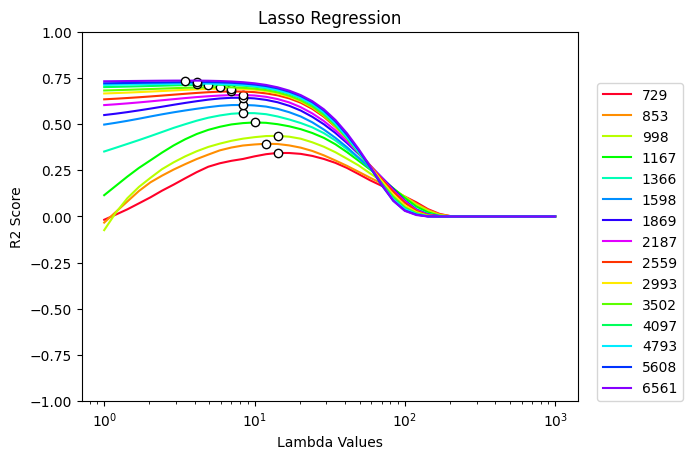

In [31]:
lamdas = lamda_dict.get('lamda')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NLAMDAS])

#MatrixLassoResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixLassoResultsInvertida = np.zeros([NLAMDAS, N_TRAIN_SAMPLES, 2])

num_dataset = 2

for i_sample in range(N_TRAIN_SAMPLES):
    for i_lamdavalue in range(NLAMDAS):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixLassoResults[i_dataset][i_sample][i_lamdavalue][1])
            MatrixLassoResultsInvertida[i_lamdavalue][i_sample][0] = matrixLassoResults[i_dataset][i_sample][i_lamdavalue][0]
            MatrixLassoResultsInvertida[i_lamdavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_lamdavalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_lamdavalue] = MatrixLassoResultsInvertida[idx_lamdavalue][idx_sample][1]


f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(N_TRAIN_SAMPLES)])

plt.xscale('log')
plt.title("Lasso Regression")
plt.xlabel("Lambda Values")
plt.ylabel("R2 Score")
for i_sample in range(N_TRAIN_SAMPLES):
    plt.plot(lamdas, r2_scores[i_sample], label = str(int(listTrainSamples[i_sample])))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    plt.plot(lamdas[i_maxValue][0], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0),title="Samples")
plt.show(f)

In [32]:
lamdas[i_maxValue]

array([3.45510729])

In [33]:
i_maxValue

(array([7], dtype=int64),)